## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

W0716 19:07:49.395448  3532 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0716 19:07:49.409424  3532 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 19:07:49.412423  3532 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W0716 19:07:52.614592  3532 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0716 19:07:52.623592  3532 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0716 19:07:53.690993  3532 deprecation.py:323] From C:\Users\user1\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0716 19:07:53.742948  3532 deprecation_wrapper.py:119] From C:\Users\user1\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 105us/step - loss: 2.0625 - acc: 0.2748 - val_loss: 1.9309 - val_acc: 0.3246
Epoch 2/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.8834 - acc: 0.3376 - val_loss: 1.8372 - val_acc: 0.3526
Epoch 3/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.8154 - acc: 0.3614 - val_loss: 1.8269 - val_acc: 0.3521
Epoch 4/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.7719 - acc: 0.3781 - val_loss: 1.8003 - val_acc: 0.3481
Epoch 5/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.7346 - acc: 0.3908 - val_loss: 1.7361 - val_acc: 0.3877
Epoch 6/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.7062 - acc: 0.4030 - val_loss: 1.7807 - val_acc: 0.3694
Epoch 7/500
50000/50000 [==============================] - 5s 100us/step - loss: 1.6823 - acc: 0.4107 - val_loss: 1.

50000/50000 [==============================] - 5s 102us/step - loss: 1.1789 - acc: 0.5878 - val_loss: 1.4240 - val_acc: 0.4911
Epoch 60/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.1676 - acc: 0.5916 - val_loss: 1.3856 - val_acc: 0.5050
Epoch 61/500
50000/50000 [==============================] - 5s 101us/step - loss: 1.1662 - acc: 0.5933 - val_loss: 1.4401 - val_acc: 0.4964
Epoch 62/500
50000/50000 [==============================] - 5s 103us/step - loss: 1.1615 - acc: 0.5952 - val_loss: 1.4278 - val_acc: 0.4954
Epoch 63/500
50000/50000 [==============================] - 5s 106us/step - loss: 1.1513 - acc: 0.5951 - val_loss: 1.4730 - val_acc: 0.4830
Epoch 64/500
50000/50000 [==============================] - 5s 108us/step - loss: 1.1421 - acc: 0.6006 - val_loss: 1.4066 - val_acc: 0.5047
Epoch 65/500
50000/50000 [==============================] - 5s 102us/step - loss: 1.1444 - acc: 0.5997 - val_loss: 1.3902 - val_acc: 0.5109
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 5s 107us/step - loss: 0.8654 - acc: 0.6985 - val_loss: 1.4618 - val_acc: 0.5221
Epoch 118/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.8488 - acc: 0.7064 - val_loss: 1.4130 - val_acc: 0.5215
Epoch 119/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.8614 - acc: 0.7025 - val_loss: 1.4008 - val_acc: 0.5320
Epoch 120/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.8548 - acc: 0.7032 - val_loss: 1.5326 - val_acc: 0.5060
Epoch 121/500
50000/50000 [==============================] - 5s 110us/step - loss: 0.8434 - acc: 0.7081 - val_loss: 1.3872 - val_acc: 0.5295
Epoch 122/500
50000/50000 [==============================] - 5s 107us/step - loss: 0.8391 - acc: 0.7084 - val_loss: 1.5058 - val_acc: 0.5140
Epoch 123/500
50000/50000 [==============================] - 6s 118us/step - loss: 0.8328 - acc: 0.7125 - val_loss: 1.7057 - val_acc: 0.4676
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 5s 103us/step - loss: 0.5725 - acc: 0.8039 - val_loss: 1.5896 - val_acc: 0.5286
Epoch 176/500
50000/50000 [==============================] - 5s 104us/step - loss: 0.5697 - acc: 0.8084 - val_loss: 1.5322 - val_acc: 0.5373
Epoch 177/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.5612 - acc: 0.8113 - val_loss: 1.5736 - val_acc: 0.5335
Epoch 178/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.5593 - acc: 0.8133 - val_loss: 1.8926 - val_acc: 0.4825
Epoch 179/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.5509 - acc: 0.8144 - val_loss: 1.5962 - val_acc: 0.5368
Epoch 180/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.5717 - acc: 0.8081 - val_loss: 1.6573 - val_acc: 0.5195
Epoch 181/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.5536 - acc: 0.8117 - val_loss: 1.8045 - val_acc: 0.4951
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 5s 103us/step - loss: 0.3444 - acc: 0.8908 - val_loss: 1.9438 - val_acc: 0.5222
Epoch 234/500
50000/50000 [==============================] - 5s 104us/step - loss: 0.3595 - acc: 0.8882 - val_loss: 1.8644 - val_acc: 0.5367
Epoch 235/500
50000/50000 [==============================] - 5s 104us/step - loss: 0.3383 - acc: 0.8974 - val_loss: 1.8987 - val_acc: 0.5270
Epoch 236/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.3203 - acc: 0.8989 - val_loss: 1.9419 - val_acc: 0.5201
Epoch 237/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.3212 - acc: 0.9023 - val_loss: 2.0025 - val_acc: 0.5249
Epoch 238/500
50000/50000 [==============================] - 5s 104us/step - loss: 0.2846 - acc: 0.9133 - val_loss: 1.9444 - val_acc: 0.5303
Epoch 239/500
50000/50000 [==============================] - 5s 104us/step - loss: 0.2804 - acc: 0.9127 - val_loss: 1.9141 - val_acc: 0.5291
Epoch 240/500
50000/50000 [

50000/50000 [==============================] - 5s 102us/step - loss: 0.1039 - acc: 0.9782 - val_loss: 3.6977 - val_acc: 0.4333
Epoch 292/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.2131 - acc: 0.9487 - val_loss: 2.3096 - val_acc: 0.5291
Epoch 293/500
50000/50000 [==============================] - 5s 104us/step - loss: 0.1213 - acc: 0.9714 - val_loss: 2.2419 - val_acc: 0.5423
Epoch 294/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0948 - acc: 0.9812 - val_loss: 2.3998 - val_acc: 0.5289
Epoch 295/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.1230 - acc: 0.9712 - val_loss: 2.3083 - val_acc: 0.5316
Epoch 296/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.1008 - acc: 0.9780 - val_loss: 2.2721 - val_acc: 0.5395
Epoch 297/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.2483 - acc: 0.9430 - val_loss: 2.6107 - val_acc: 0.4944
Epoch 298/500
50000/50000 [

50000/50000 [==============================] - 5s 102us/step - loss: 0.0338 - acc: 0.9973 - val_loss: 2.6333 - val_acc: 0.5275
Epoch 350/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0335 - acc: 0.9973 - val_loss: 2.6133 - val_acc: 0.5419
Epoch 351/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0325 - acc: 0.9973 - val_loss: 2.5951 - val_acc: 0.5388
Epoch 352/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.0309 - acc: 0.9978 - val_loss: 2.6255 - val_acc: 0.5401
Epoch 353/500
50000/50000 [==============================] - 5s 103us/step - loss: 0.0305 - acc: 0.9978 - val_loss: 2.6211 - val_acc: 0.5396
Epoch 354/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0295 - acc: 0.9979 - val_loss: 2.6566 - val_acc: 0.5372
Epoch 355/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0293 - acc: 0.9978 - val_loss: 2.6473 - val_acc: 0.5398
Epoch 356/500
50000/50000 [

50000/50000 [==============================] - 5s 97us/step - loss: 0.0131 - acc: 0.9996 - val_loss: 2.8691 - val_acc: 0.5373
Epoch 408/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.0130 - acc: 0.9997 - val_loss: 2.8672 - val_acc: 0.5402
Epoch 409/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.0130 - acc: 0.9997 - val_loss: 2.8700 - val_acc: 0.5401
Epoch 410/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.0127 - acc: 0.9997 - val_loss: 2.8795 - val_acc: 0.5385
Epoch 411/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.0125 - acc: 0.9996 - val_loss: 2.8710 - val_acc: 0.5387
Epoch 412/500
50000/50000 [==============================] - 5s 99us/step - loss: 0.0125 - acc: 0.9996 - val_loss: 2.9173 - val_acc: 0.5358
Epoch 413/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.0123 - acc: 0.9996 - val_loss: 2.9228 - val_acc: 0.5322
Epoch 414/500
50000/50000 [======

50000/50000 [==============================] - 5s 97us/step - loss: 0.0093 - acc: 0.9999 - val_loss: 2.9471 - val_acc: 0.5404
Epoch 466/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.0090 - acc: 0.9999 - val_loss: 2.9592 - val_acc: 0.5412
Epoch 467/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.0088 - acc: 0.9999 - val_loss: 2.9541 - val_acc: 0.5406
Epoch 468/500
50000/50000 [==============================] - 5s 99us/step - loss: 0.0087 - acc: 0.9999 - val_loss: 2.9849 - val_acc: 0.5373
Epoch 469/500
50000/50000 [==============================] - 5s 98us/step - loss: 0.0088 - acc: 0.9999 - val_loss: 2.9717 - val_acc: 0.5402
Epoch 470/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.0085 - acc: 0.9998 - val_loss: 2.9798 - val_acc: 0.5411
Epoch 471/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.0082 - acc: 0.9999 - val_loss: 2.9805 - val_acc: 0.5388
Epoch 472/500
50000/50000 [======

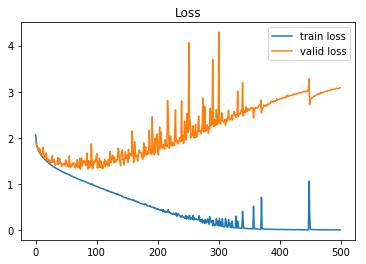

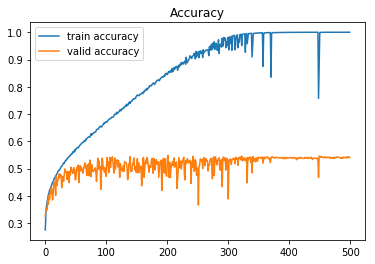

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()